# Flickr REST API: Get information from photos, get and plot photos

## Libraries and Settings

In [4]:
# Libraries
import os
import json
import random
import fnmatch
import pandas as pd
import urllib.request
from flickrapi import FlickrAPI
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Keys for flickr API
try:
    with open('credentials.json', 'r') as file:
        credentials = json.load(file)

    # Keys for flickr API
    FLICKR_PUBLIC = credentials['FLICKR_PUBLIC']
    FLICKR_SECRET = credentials['FLICKR_SECRET']
except:
    print('Please provide your credentials in credentials.json file!')

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(f'Current working directory: {os.getcwd()}')

Current working directory: u:\Lektionen\CAS_DAENG_HS2024\Data_Ingestion\data_ingestion\04_Flickr_WebAPI


## Define photo topic and get photos

In [11]:
# Settings (extras = different resolution of photos)
flickr = FlickrAPI(FLICKR_PUBLIC, FLICKR_SECRET, format='parsed-json')
extras = 'url_sq,url_t,url_s,url_q,url_m,url_n,url_z,url_c,url_l,url_o'

# Get information about photos using the flickr API
cont = flickr.photos.search(text='butterflies', per_page=10, extras=extras)
photos = cont['photos']

# Object type
print(type(photos))

# Print keys of dictionary
print(photos.keys())

# Print values
df = pd.DataFrame.from_dict(photos)
df

<class 'dict'>
dict_keys(['page', 'pages', 'perpage', 'total', 'photo'])


,page,pages,perpage,total,photo
0,1,14993,10,149928,"{'id': '53941871694', 'owner': '84265607@N00',..."
1,1,14993,10,149928,"{'id': '53941659583', 'owner': '23286095@N05',..."
2,1,14993,10,149928,"{'id': '53941657553', 'owner': '51291527@N06',..."
3,1,14993,10,149928,"{'id': '53941736704', 'owner': '136826721@N08'..."
4,1,14993,10,149928,"{'id': '53941373566', 'owner': '31993878@N05',..."
5,1,14993,10,149928,"{'id': '53940464557', 'owner': '195912051@N07'..."
6,1,14993,10,149928,"{'id': '53941679239', 'owner': '43888711@N07',..."
7,1,14993,10,149928,"{'id': '53940430767', 'owner': '199491936@N02'..."
8,1,14993,10,149928,"{'id': '53941727965', 'owner': '45621748@N05',..."
9,1,14993,10,149928,"{'id': '53941278706', 'owner': '44889543@N00',..."


## Derive information about the first photo from the dictionary

In [6]:
# Derive information about the first photo from the dictionary
photo_01 = photos["photo"][random.randint(0,9)]

try:
    from pprint import pprint
    pprint(photo_01)
except:
    print(photo_01)

{'farm': 66,
 'height_c': 533,
 'height_l': 683,
 'height_m': 333,
 'height_n': 213,
 'height_o': 3840,
 'height_q': 150,
 'height_s': 160,
 'height_sq': 75,
 'height_t': 67,
 'height_z': 427,
 'id': '53941736704',
 'isfamily': 0,
 'isfriend': 0,
 'ispublic': 1,
 'owner': '136826721@N08',
 'secret': 'a09f228134',
 'server': '65535',
 'title': 'Black Swallowtail Butterfly Macro 1 2024-08-22',
 'url_c': 'https://live.staticflickr.com/65535/53941736704_a09f228134_c.jpg',
 'url_l': 'https://live.staticflickr.com/65535/53941736704_a09f228134_b.jpg',
 'url_m': 'https://live.staticflickr.com/65535/53941736704_a09f228134.jpg',
 'url_n': 'https://live.staticflickr.com/65535/53941736704_a09f228134_n.jpg',
 'url_o': 'https://live.staticflickr.com/65535/53941736704_ce6968a7d3_o.jpg',
 'url_q': 'https://live.staticflickr.com/65535/53941736704_a09f228134_q.jpg',
 'url_s': 'https://live.staticflickr.com/65535/53941736704_a09f228134_m.jpg',
 'url_sq': 'https://live.staticflickr.com/65535/53941736704_a

## Show url of first photo in the list

In [7]:
# Photo url
url = photo_01["url_s"]
url

'https://live.staticflickr.com/65535/53941736704_a09f228134_m.jpg'

## Download single photo

In [8]:
# Download single photo
urllib.request.urlretrieve(url, 'photo_01.jpg')

('photo_01.jpg', <http.client.HTTPMessage at 0x2085ab7d590>)

## Plot single photo

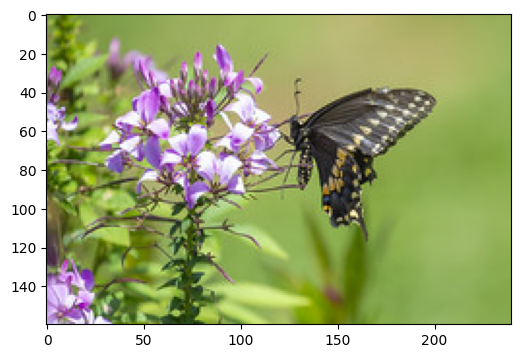

In [9]:
# Plot photo
img = mpimg.imread('photo_01.jpg')
plt.figure(figsize=(6,6))
imgplot = plt.imshow(img)

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [10]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2024-08-23 09:44:11
Python Version: 3.11.9
-----------------------------------
